# Price Cut Chandler Decision Tree

### Data Cleanup

The following property types were eliminated from the original CSV:
1. Lot/Land

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Name of the CSV file
file_path = Path("Resources/Zillow_Chandler_For_Sale.csv")
df = pd.read_csv(file_path)
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,NaN,Apartment for sale,Apartment,NaN,289000,No,NaN,NaN,1075,...,2,2,RE/MAX Solutions,NaN,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,NaN,Apartment for sale,Apartment,5.0,389999,No,NaN,NaN,1069,...,2,2,RE/MAX Alliance Group,NaN,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,NaN,Apartment for sale,Apartment,4.0,398000,No,NaN,NaN,1480,...,3,2,DeLex Realty,NaN,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,NaN,Apartment for sale,Apartment,15.0,225000,No,NaN,NaN,705,...,1,1,DPR Realty LLC,NaN,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,NaN,Apartment for sale,Apartment,NaN,299900,Yes,35100.0,02/13/2024,979,...,1,1,Arizona Elite Properties,NaN,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,https://www.zillow.com/community/village-at-ha...,NaN,New construction,Unknown,41.0,607000,No,NaN,NaN,1324,...,3,2,NaN,NaN,"Plan 5 Plan, The Village at Hamilton Landing",Chandler,85286,AZ,USA,5.33
435,https://www.zillow.com/homedetails/960-E-Mulbe...,NaN,New construction,Unknown,74.0,607000,No,NaN,NaN,1324,...,3,2,RSP New Village Homes,NaN,960 E Mulberry Pl,Chandler,85286,AZ,USA,5.33
436,https://www.zillow.com/community/willis-common...,NaN,New construction,Unknown,NaN,580000,No,NaN,NaN,2101,...,3,3,NaN,NaN,"Ancala Plan, Willis Commons",Chandler,85286,AZ,USA,5.33
437,https://www.zillow.com/homedetails/972-E-Mulbe...,NaN,New construction,Unknown,74.0,595000,No,NaN,NaN,1292,...,3,2,RSP New Village Homes,NaN,972 E Mulberry Pl,Chandler,85286,AZ,USA,5.33


In [3]:
# Clean the dataframe by replacing NaN values with 0
df.fillna(0, inplace=True)

In [4]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,0.0,Apartment for sale,Apartment,0.0,289000,No,0.0,0,1075,...,2,2,RE/MAX Solutions,0.0,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,5.0,389999,No,0.0,0,1069,...,2,2,RE/MAX Alliance Group,0.0,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,0.0,Apartment for sale,Apartment,4.0,398000,No,0.0,0,1480,...,3,2,DeLex Realty,0.0,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,0.0,Apartment for sale,Apartment,15.0,225000,No,0.0,0,705,...,1,1,DPR Realty LLC,0.0,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,0.0,299900,Yes,35100.0,02/13/2024,979,...,1,1,Arizona Elite Properties,0.0,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,https://www.zillow.com/community/village-at-ha...,0.0,New construction,Unknown,41.0,607000,No,0.0,0,1324,...,3,2,0,0.0,"Plan 5 Plan, The Village at Hamilton Landing",Chandler,85286,AZ,USA,5.33
435,https://www.zillow.com/homedetails/960-E-Mulbe...,0.0,New construction,Unknown,74.0,607000,No,0.0,0,1324,...,3,2,RSP New Village Homes,0.0,960 E Mulberry Pl,Chandler,85286,AZ,USA,5.33
436,https://www.zillow.com/community/willis-common...,0.0,New construction,Unknown,0.0,580000,No,0.0,0,2101,...,3,3,0,0.0,"Ancala Plan, Willis Commons",Chandler,85286,AZ,USA,5.33
437,https://www.zillow.com/homedetails/972-E-Mulbe...,0.0,New construction,Unknown,74.0,595000,No,0.0,0,1292,...,3,2,RSP New Village Homes,0.0,972 E Mulberry Pl,Chandler,85286,AZ,USA,5.33


In [5]:
# Import scikit-learn libraries including Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# Convert 'Price was cut' to a binary indicator (0 and 1)
df['Price was cut'] = df['Price was cut'].apply(lambda x: 1 if x == 'Yes' else 0)
df.tail()

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
434,https://www.zillow.com/community/village-at-ha...,0.0,New construction,Unknown,41.0,607000,0,0.0,0,1324,...,3,2,0,0.0,"Plan 5 Plan, The Village at Hamilton Landing",Chandler,85286,AZ,USA,5.33
435,https://www.zillow.com/homedetails/960-E-Mulbe...,0.0,New construction,Unknown,74.0,607000,0,0.0,0,1324,...,3,2,RSP New Village Homes,0.0,960 E Mulberry Pl,Chandler,85286,AZ,USA,5.33
436,https://www.zillow.com/community/willis-common...,0.0,New construction,Unknown,0.0,580000,0,0.0,0,2101,...,3,3,0,0.0,"Ancala Plan, Willis Commons",Chandler,85286,AZ,USA,5.33
437,https://www.zillow.com/homedetails/972-E-Mulbe...,0.0,New construction,Unknown,74.0,595000,0,0.0,0,1292,...,3,2,RSP New Village Homes,0.0,972 E Mulberry Pl,Chandler,85286,AZ,USA,5.33
438,https://www.zillow.com/community/village-at-ha...,0.0,New construction,Unknown,41.0,595000,0,0.0,0,1292,...,3,2,0,0.0,"Plan 3 Plan, The Village at Hamilton Landing",Chandler,85286,AZ,USA,5.33


In [7]:
# Feature selection
# Selecting relevant features and the target variable
X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
#X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City']]
#X = df[['Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
y = df['Price was cut']
#y = df['Property price (USD)']

In [8]:
# Handle the categorical variables
categorical_features = ['Property type', 'City']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X.loc[:,col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [9]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/93-N-Cooper...,0.0,Apartment for sale,Apartment,0.0,289000,0,0.0,0,1075,...,2,2,RE/MAX Solutions,0.0,93 N Cooper Rd UNIT 29,Chandler,85225,AZ,USA,5.33
1,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,5.0,389999,0,0.0,0,1069,...,2,2,RE/MAX Alliance Group,0.0,295 N Rural Rd UNIT 155,Chandler,85226,AZ,USA,5.33
2,https://www.zillow.com/homedetails/1351-N-Plea...,0.0,Apartment for sale,Apartment,4.0,398000,0,0.0,0,1480,...,3,2,DeLex Realty,0.0,1351 N Pleasant Dr UNIT 1098,Chandler,85225,AZ,USA,5.33
3,https://www.zillow.com/homedetails/1075-E-Chan...,0.0,Apartment for sale,Apartment,15.0,225000,0,0.0,0,705,...,1,1,DPR Realty LLC,0.0,1075 E Chandler Blvd UNIT 119,Chandler,85225,AZ,USA,5.33
4,https://www.zillow.com/homedetails/295-N-Rural...,0.0,Apartment for sale,Apartment,0.0,299900,1,35100.0,02/13/2024,979,...,1,1,Arizona Elite Properties,0.0,295 N Rural Rd UNIT 138,Chandler,85226,AZ,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,https://www.zillow.com/community/village-at-ha...,0.0,New construction,Unknown,41.0,607000,0,0.0,0,1324,...,3,2,0,0.0,"Plan 5 Plan, The Village at Hamilton Landing",Chandler,85286,AZ,USA,5.33
435,https://www.zillow.com/homedetails/960-E-Mulbe...,0.0,New construction,Unknown,74.0,607000,0,0.0,0,1324,...,3,2,RSP New Village Homes,0.0,960 E Mulberry Pl,Chandler,85286,AZ,USA,5.33
436,https://www.zillow.com/community/willis-common...,0.0,New construction,Unknown,0.0,580000,0,0.0,0,2101,...,3,3,0,0.0,"Ancala Plan, Willis Commons",Chandler,85286,AZ,USA,5.33
437,https://www.zillow.com/homedetails/972-E-Mulbe...,0.0,New construction,Unknown,74.0,595000,0,0.0,0,1292,...,3,2,RSP New Village Homes,0.0,972 E Mulberry Pl,Chandler,85286,AZ,USA,5.33


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = clf.predict(X_test)


In [13]:
# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5113636363636364
Confusion Matrix:
 [[31 20]
 [23 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59        51
           1       0.41      0.38      0.39        37

    accuracy                           0.51        88
   macro avg       0.49      0.49      0.49        88
weighted avg       0.51      0.51      0.51        88



# Initial Result of the Decision Tree Model

### Accuracy Score
The accuracy score of 0.511 (or 51.1%) indicates that the model correctly predicts the outcome (whether the price will be cut or not) in approximately 51.1% of the cases. This metric provides a general idea of the model's overall performance but doesn't detail its effectiveness in distinguishing between the two classes.



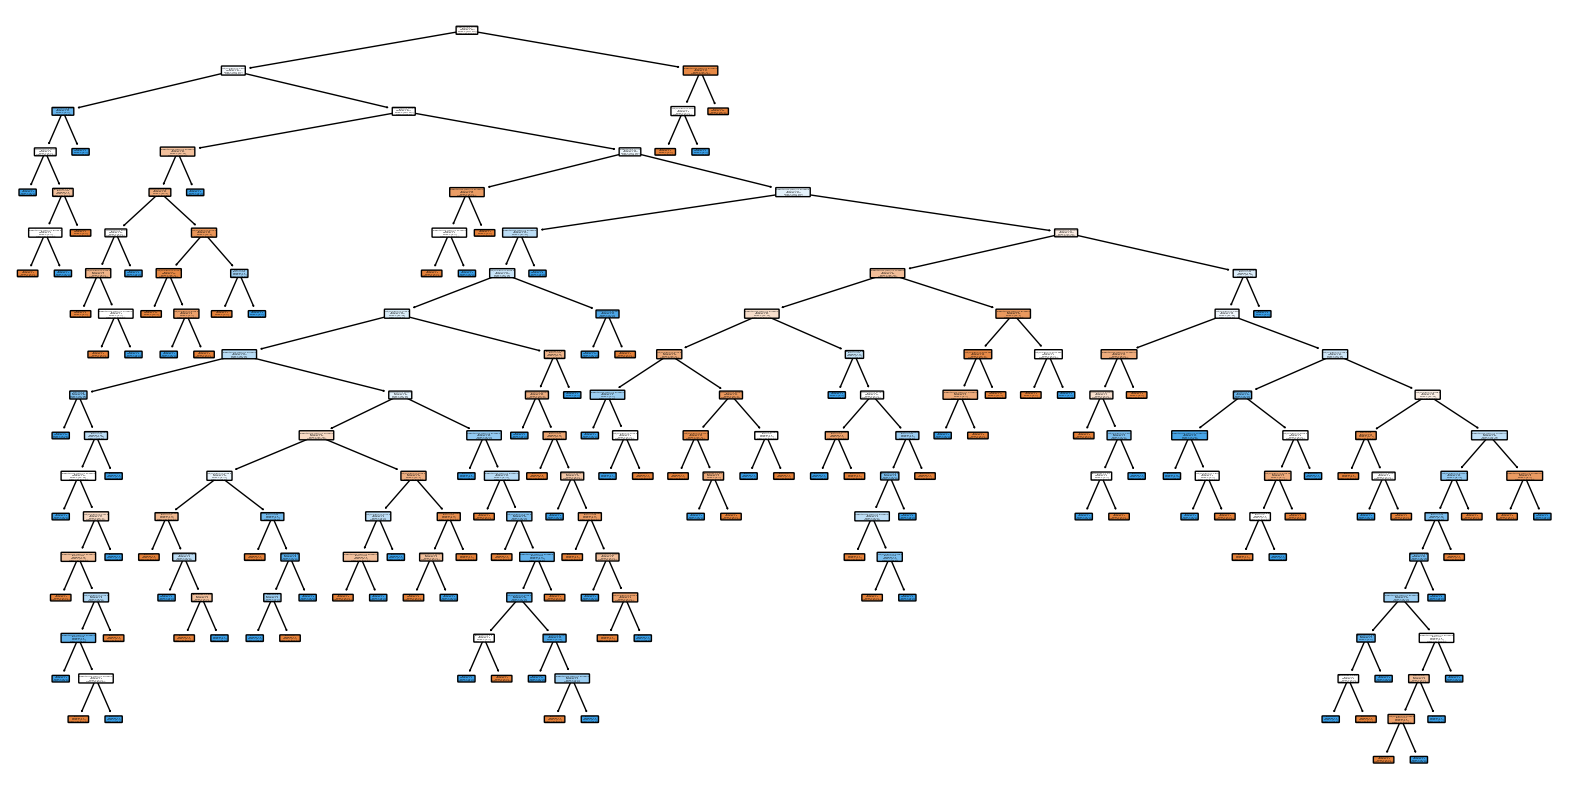

In [14]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, class_names=["No Price Cut", "Price Cut"], feature_names=X.columns)
plt.show()
